In [517]:
import numpy as np
import pandas as pd

In [518]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression



import matplotlib.pyplot as plt
import seaborn as sns

-----------------

In [601]:
df = pd.read_csv("./data/train.csv", encoding = "latin1")
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,Very Good,I,SI2,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,Very Good,E,SI1,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,Ideal,H,VS2,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,Premium,H,VS2,61.3,60.0,8.16,8.11,4.99,9.680


In [520]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [521]:
df.shape

(40455, 11)

In [522]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [604]:
corr = df.corr()   
corr

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006196,0.001098,-0.008829,-0.007112,-0.006420,-0.007766,-0.006926
carat,-0.006196,1.000000,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
depth,0.001098,0.025089,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,-0.008829,0.182590,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,-0.007112,0.974516,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,-0.006420,0.950563,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,-0.007766,0.947930,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157
price,-0.006926,0.920878,-0.000924,0.158128,0.957653,0.934700,0.930157,1.000000


#### COLUMNAS CATEGÓRICAS

Se puede hacer con get.dummies, lo he probado pero visualmente, una vez hecho la corr, no me cuadraba mucho, por ello he asignado los valores de las columnas categóricas fijando en los valores de cada uno.

In [524]:
df["clarity"].unique()

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [525]:
df.clarity.value_counts() 

SI1     9815
VS2     9199
SI2     6887
VS1     6171
VVS2    3837
VVS1    2689
IF      1327
I1       530
Name: clarity, dtype: int64

In [526]:
clarity = {
    "IF": 8,
    "VVS1": 7,
    "VVS2": 6,
    "VS1": 5,
    "VS2": 4,
    "SI1": 3,
    "SI2": 2,
    "I1": 1
}

In [527]:
df["clarity"] = df.clarity.map(clarity)
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,4,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,3,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,6,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,4,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,Very Good,I,2,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,Very Good,E,3,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,Ideal,H,4,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,Premium,H,4,61.3,60.0,8.16,8.11,4.99,9.680


-------------

In [528]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [529]:
df.cut.value_counts() 

Ideal        16250
Premium      10336
Very Good     9066
Good          3604
Fair          1199
Name: cut, dtype: int64

In [530]:
cut = {
    "Ideal": 5,
    "Premium": 4,
    "Very Good": 3,
    "Good": 2,
    "Fair": 1
}

In [531]:
df["cut"] = df.cut.map(cut)
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,4,F,4,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,3,E,2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,5,E,3,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,3,F,6,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,5,G,4,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,3,I,2,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,3,E,3,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,5,H,4,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,4,H,4,61.3,60.0,8.16,8.11,4.99,9.680


-------------

In [532]:
df["color"].unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

In [533]:
df.color.value_counts() 

G    8523
E    7322
F    7141
H    6241
D    5028
I    4075
J    2125
Name: color, dtype: int64

In [534]:
color = {
    "D": 1,
    "E": 2,
    "F": 3,
    "G": 4,
    "H": 5,
    "I": 6,
    "J": 7
}

In [535]:
df["color"] = df.color.map(color)
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,4,3,4,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,3,2,2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,5,2,3,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,3,3,6,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,5,4,4,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,3,6,2,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,3,2,3,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,5,5,4,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,4,5,4,61.3,60.0,8.16,8.11,4.99,9.680


In [603]:
df.to_csv("./data/train_clean.csv", header=True, index=False)

In [537]:
corr = df.corr()
corr

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.006196,0.011821,0.000967,0.001828,0.001098,-0.008829,-0.007112,-0.006420,-0.007766,-0.006926
carat,-0.006196,1.000000,-0.134465,0.289987,-0.350899,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
cut,0.011821,-0.134465,1.000000,-0.019047,0.190573,-0.211411,-0.434269,-0.125001,-0.121029,-0.147742,-0.087224
color,0.000967,0.289987,-0.019047,1.000000,0.027597,0.043201,0.028587,0.269438,0.263016,0.265420,0.154998
clarity,0.001828,-0.350899,0.190573,0.027597,1.000000,-0.062659,-0.162142,-0.370347,-0.356866,-0.363034,-0.212762
depth,0.001098,0.025089,-0.211411,0.043201,-0.062659,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,-0.008829,0.182590,-0.434269,0.028587,-0.162142,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,-0.007112,0.974516,-0.125001,0.269438,-0.370347,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,-0.006420,0.950563,-0.121029,0.263016,-0.356866,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,-0.007766,0.947930,-0.147742,0.265420,-0.363034,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157


-----------

<AxesSubplot:>

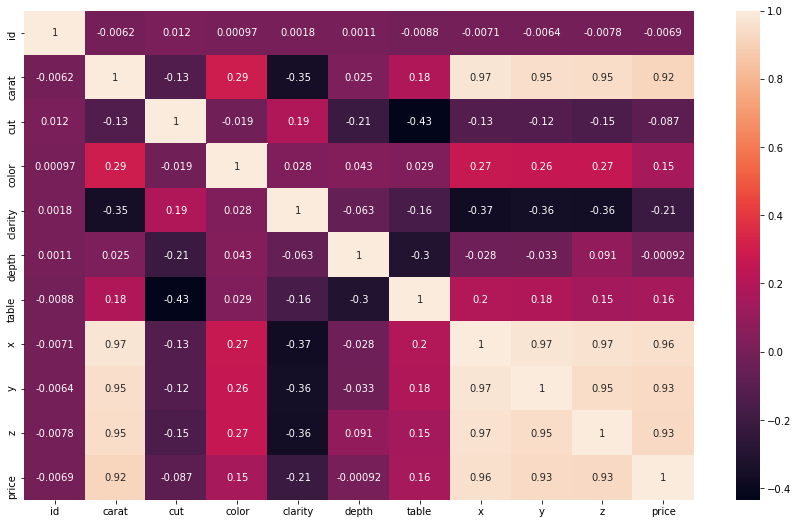

In [538]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

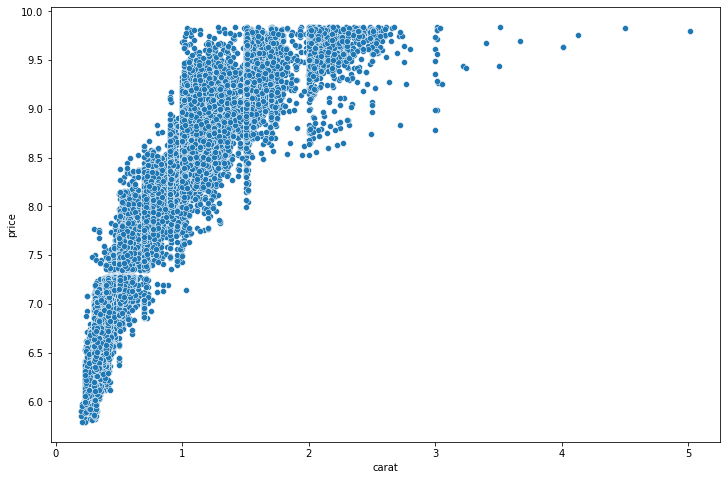

In [562]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["carat"], y=df["price"])

In [567]:
train_clean.to_csv("./data/train_clean")

#### Train Test Split

In [568]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [569]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32364, 10)
(8091, 10)
(32364,)
(8091,)


In [570]:
std_model = LinearRegression()
std_model.fit(X_train, y_train)

LinearRegression()

In [571]:
y_pred = std_model.predict(X_test)
y_pred

array([8.52234442, 8.67737837, 7.06878949, ..., 6.59437241, 6.98254317,
       7.95053144])

In [572]:
r2 = r2_score(y_pred, y_test)
r2

0.8038249671171948

---------------

#### TEST. 1

In [573]:
test = pd.read_csv("./data/test.csv")

In [574]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93


In [575]:
test["clarity"] = test.clarity.map(clarity)
test["cut"] = test.cut.map(cut)
test["color"] = test.color.map(color)

In [576]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,3,2,2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,3,3,2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,5,1,4,61.9,56.0,5.39,5.34,3.32
3,3,0.90,3,1,4,62.3,56.0,6.14,6.18,3.84
4,4,2.01,4,7,5,60.2,61.0,8.23,8.16,4.93


In [577]:
testing = test
testing.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,3,2,2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,3,3,2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,5,1,4,61.9,56.0,5.39,5.34,3.32
3,3,0.90,3,1,4,62.3,56.0,6.14,6.18,3.84
4,4,2.01,4,7,5,60.2,61.0,8.23,8.16,4.93


In [578]:
y_pred_test = std_model.predict(test)
y_pred_test

array([7.02892807, 8.34483574, 7.6847831 , ..., 6.6610986 , 6.5541158 ,
       8.0935233 ])

In [579]:
test["price"] = y_pred_test
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.51,3,2,2,58.3,61.9,5.19,5.20,3.04,7.028928
1,1,1.02,3,3,2,63.0,58.0,6.37,6.43,4.03,8.344836
2,2,0.59,5,1,4,61.9,56.0,5.39,5.34,3.32,7.684783
3,3,0.90,3,1,4,62.3,56.0,6.14,6.18,3.84,8.453389
4,4,2.01,4,7,5,60.2,61.0,8.23,8.16,4.93,9.815006


In [580]:
test_1 = test[["id","price"]]
test_1 = test_1.set_index("id")
test_1

,price
id,
0,7.028928
1,8.344836
2,7.684783
3,8.453389
4,9.815006
...,...
13480,8.323920
13481,6.485302
13482,6.661099


In [581]:
test_1.to_csv("./data/test_1.csv")

----------------

#### Test 2. Random Forest

In [591]:
X = train_clean.drop(columns=["price"])
y = train_clean["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [592]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [593]:
regressor = RandomForestRegressor(n_estimators=1000, warm_start=True, random_state=0)

In [594]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0, warm_start=True)

In [600]:
y_pred = regressor.predict(X_test)
y_pred

array([7.676318, 8.667999, 6.654808, ..., 9.451374, 8.678198, 6.6204  ])

In [596]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.0806094162649859

In [597]:
mse = mean_squared_error(y_test, y_pred)
mse

0.011814390860034515

In [598]:
rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

0.10869402403092138

In [589]:
testing["price"] = y_pred_test2
testing.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.51,3,2,2,58.3,61.9,5.19,5.20,3.04,7.068501
1,1,1.02,3,3,2,63.0,58.0,6.37,6.43,4.03,8.336767
2,2,0.59,5,1,4,61.9,56.0,5.39,5.34,3.32,7.665693
3,3,0.90,3,1,4,62.3,56.0,6.14,6.18,3.84,8.443815
4,4,2.01,4,7,5,60.2,61.0,8.23,8.16,4.93,9.500502


In [590]:
test_2 = testing[["id","price"]]
test_2 = test_2.set_index("id")
test_2

,price
id,
0,7.068501
1,8.336767
2,7.665693
3,8.443815
4,9.500502
...,...
13480,8.513293
13481,6.600572
13482,6.530915


In [486]:
test_2.to_csv("./data/test_2.csv")

--------------